## Ejemplo SS2 Python + Jupyter
* Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


: 

### Importar Librerías
Se importan las siguientes librerías:
- `pandas`: Para la manipulación y análisis de datos.
- `numpy`: Para cálculos numéricos y operaciones matemáticas.
- `matplotlib.pyplot`: Para la generación de gráficos y visualizaciones.

### Cargar csv

In [ ]:
csv = pd.read_csv('Datos.csv')
csv.head()
csv.describe()
csv.info()
csv.tail()

### Cargar CSV
Se carga el archivo `Datos.csv` en un DataFrame de `pandas` y se realiza un análisis inicial:
- `head()`: Muestra las primeras filas del DataFrame.
- `describe()`: Proporciona estadísticas descriptivas de las columnas numéricas.
- `info()`: Muestra información sobre las columnas, tipos de datos y valores nulos.
- `tail()`: Muestra las últimas filas del DataFrame.

### Limpieza

In [ ]:
clean_csv = csv.dropna(subset=['Rating','Review'])
clean_csv = clean_csv.drop_duplicates()
clean_csv.info()

### Limpieza de Datos
Se realiza una limpieza básica del DataFrame:
- Se eliminan las filas con valores nulos en las columnas `Rating` y `Review`.
- Se eliminan las filas duplicadas.
- Se verifica la estructura del DataFrame limpio utilizando `info()`.

### Análisis

In [ ]:
promedio_calificaciones = clean_csv['Rating'].mean()
print("Promeidio de Calificaciones: ",promedio_calificaciones)

mejor_calificacion = clean_csv['Rating'].max()
print("Mejor Calificacion: ",mejor_calificacion)

curso_mejor_calificado = clean_csv.loc[clean_csv['Rating'].idxmax()]
print("Curso mejor calificado: ",curso_mejor_calificado['Course Title'])

peor_calificacion = clean_csv['Rating'].min()
print("Peor Calificacion: ",peor_calificacion)

curso_peor_calificado = clean_csv.loc[clean_csv['Rating'].idxmin()]
print("Curso peor calificado: ",curso_peor_calificado['Course Title'])


### Análisis de Calificaciones
Se realiza un análisis básico de las calificaciones:
- Se calcula el promedio de las calificaciones (`mean()`).
- Se identifica la mejor calificación (`max()`) y el curso asociado.
- Se identifica la peor calificación (`min()`) y el curso asociado.

### Horarios Flexibles

In [ ]:
cursos_flexibles = clean_csv[clean_csv['Schedule'] == 'Flexible schedule']
print("Cursos con horario flexible: ",len(cursos_flexibles))

porcentaje_cursos_flexibles = (len(cursos_flexibles) / len(clean_csv)) * 100
print("Porcentaje de cursos con horario flexible: ",porcentaje_cursos_flexibles, "%")



### Análisis de Horarios Flexibles
Se analiza la cantidad y el porcentaje de cursos con horarios flexibles:
- Se filtran los cursos con `Schedule` igual a "Flexible schedule".
- Se calcula el porcentaje de estos cursos respecto al total.

## Gráficas para la práctica

### Barras

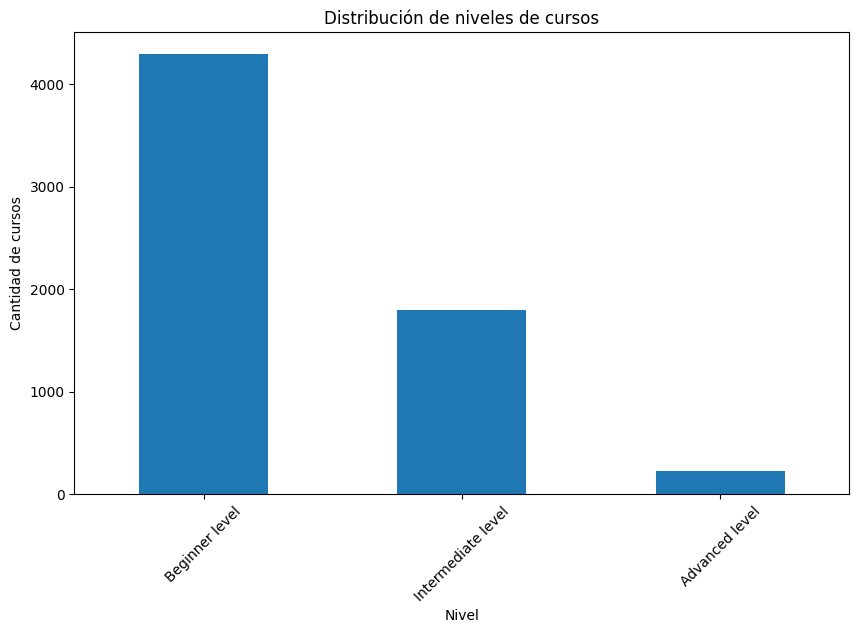

In [14]:
plt.figure(figsize=(10, 6))
clean_csv['Level'].value_counts().plot(kind='bar')
plt.title('Distribución de niveles de cursos')
plt.xlabel('Nivel')
plt.ylabel('Cantidad de cursos')
plt.xticks(rotation=45)
plt.show()

### Barras
Se genera una gráfica de barras para mostrar la distribución de los cursos por nivel (principiante, intermedio, avanzado).

### Categoría Horizontal

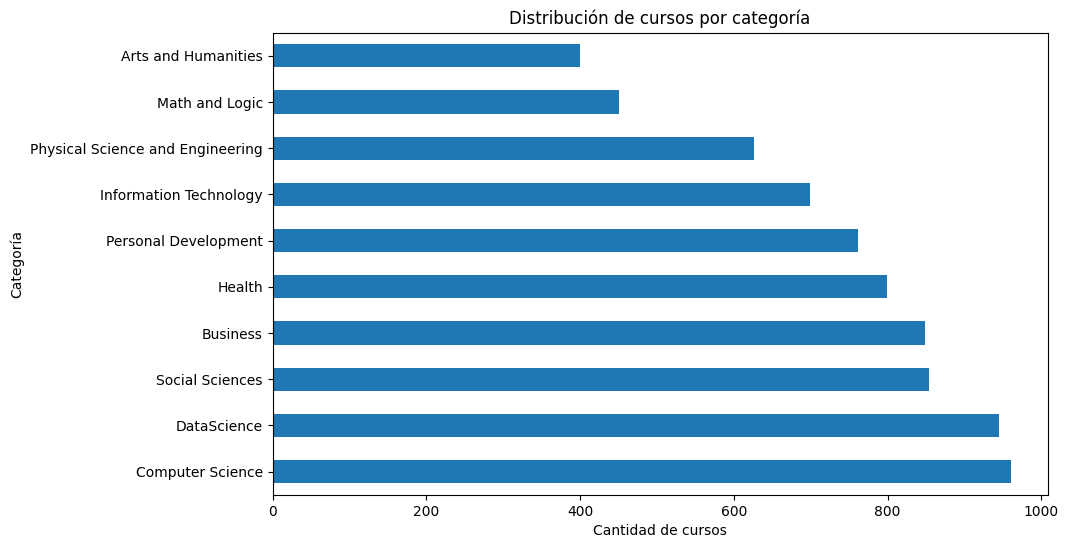

In [15]:
plt.figure(figsize=(10, 6))
clean_csv['Keyword'].value_counts().plot(kind='barh')
plt.title('Distribución de cursos por categoría')
plt.xlabel('Cantidad de cursos')
plt.ylabel('Categoría')
plt.show()

### Categoría Horizontal
Se genera una gráfica de barras horizontal para mostrar la distribución de los cursos por categoría (`Keyword`).

# NLTK

# NLTK
Se utiliza la librería NLTK para realizar procesamiento de lenguaje natural (NLP).

## Importaciones e instalaciones

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

## Importaciones e instalaciones
Se importan las librerías necesarias para el procesamiento de texto:
- `nltk`: Para realizar tokenización, lematización, análisis de sentimientos, etc.
- `wordcloud`: Para generar nubes de palabras.

## Archivo TXT

## Archivo TXT
Se carga el archivo `Coursera Comments.txt` para realizar análisis de texto.

In [20]:
with open('Coursera Comments.txt', 'r', encoding='utf-8') as file:
    text = file.read()

print("Texto parcial: ",text[:500])

### Tokenizar

### Tokenizar
Se divide el texto en palabras (tokens) y se eliminan caracteres no alfabéticos.

In [23]:
tokens = word_tokenize(text)
print("Tokens: ",tokens[:10])
clean_tokens = [token.lower() for token in tokens if token.isalpha()]
print("Tokens limpios: ",clean_tokens[:10])

Tokens:  ['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', 'con', '5', 'estrellas']
Tokens limpios:  ['abril', 'vargas', 'pérez', 'opiniones', 'pt', 'valorada', 'con', 'estrellas', 'sobre', 'ago']


### Stopwords

### Stopwords
Se cargan las palabras vacías (stopwords) en inglés y español para eliminarlas del texto.

In [ ]:
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))
print("Stop words: ",stop_words)

Stop words:  {'estuvisteis', 'd', 'sentidos', 'whom', 'te', 'fueseis', 'suyos', 'only', "weren't", 'con', 'estuviese', 'seríamos', 'habían', 'ni', 'sus', 'seas', 'hay', 'otras', 'tuviste', 'which', 'algo', 'suyo', 'tenéis', 'tienen', "you'll", 'their', 'habidas', 'hayan', 'hubiese', 'for', 'tu', "she'd", 'mí', 'habido', "hasn't", 'hubisteis', 'all', 'hubieses', 'tengan', 'estuviste', 'your', 'desde', 'should', 'than', "you'd", 'weren', 'he', 'sobre', "you're", 'poco', 're', "isn't", 'muy', 'yo', 'vuestros', 'tendría', 'on', 'under', 'soy', 'eres', 'his', 'por', 'del', 'herself', 'estando', 'do', 'hubo', 'lo', 'algunas', 'mis', 'now', 'nosotras', "aren't", 'algunos', 'otros', 'estamos', 'mustn', 'éramos', 'couldn', 'un', 'tus', 'porque', 'los', 'estabas', 'because', 'ha', 'seréis', "haven't", 'hasn', 'yours', 'below', 'down', 'ma', 'hubiesen', 'further', 'wasn', "won't", 'estaremos', 'hayáis', 'if', 'esta', 'había', 'eras', 'estemos', 'estado', 'fuerais', 'hubieras', 'será', 'yourselves

### Filtrar Tokens

### Filtrar Tokens
Se eliminan las palabras vacías del texto para obtener tokens más relevantes.

In [25]:
filter_tokens = [token for token in clean_tokens if token not in stop_words]
print("Tokens filtrados: ",filter_tokens[:10])

Tokens filtrados:  ['abril', 'vargas', 'pérez', 'opiniones', 'pt', 'valorada', 'estrellas', 'ago', 'escandalizada', 'confundida']


### Lemantizar

### Lematizar
Se reduce cada palabra a su forma base utilizando un lematizador.

In [26]:
lemmantizer = WordNetLemmatizer()

lemmatized_tokens = [lemmantizer.lemmatize(token) for token in filter_tokens]
print("Tokens lemmatizados: ",lemmatized_tokens[:10])

Tokens lemmatizados:  ['abril', 'vargas', 'pérez', 'opiniones', 'pt', 'valorada', 'estrellas', 'ago', 'escandalizada', 'confundida']


### Frecuencias

### Frecuencias
Se calcula la frecuencia de las palabras más comunes en el texto.

Frecuencia de tokens:  [('semana', 1641), ('curso', 1324), ('ta', 922), ('participantes', 837), ('dudas', 807), ('portafolio', 796), ('si', 641), ('foros', 535), ('compañeros', 497), ('evaluación', 449)]


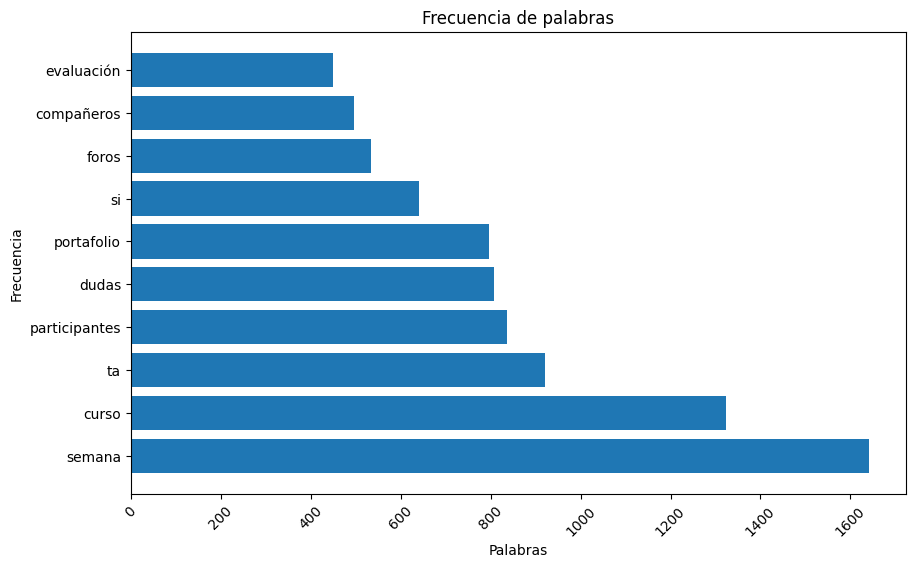

In [29]:
freq = Counter(lemmatized_tokens)
print("Frecuencia de tokens: ",freq.most_common(10))

freq_words = freq.most_common(10)
words = [word for word, count in freq_words]
counts = [count for word, count in freq_words]

plt.figure(figsize=(10, 6))
plt.barh(words, counts)
plt.title('Frecuencia de palabras')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


### Nube de Palabras

### Nube de Palabras
Se genera una visualización de las palabras más frecuentes en una nube de palabras.

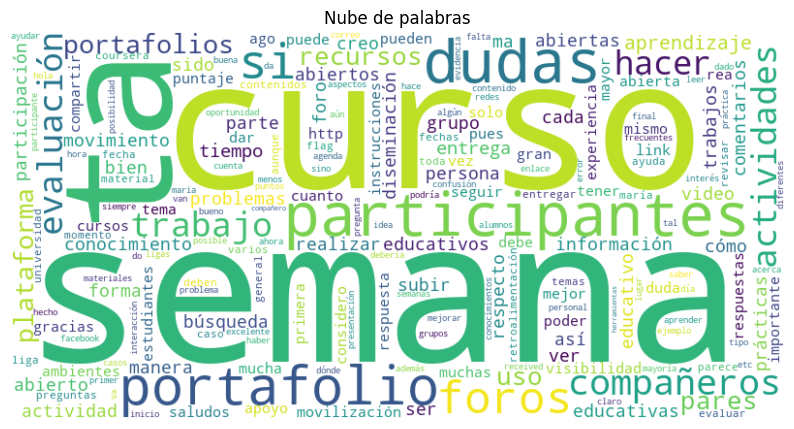

In [30]:
worldcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
plt.figure(figsize=(10, 6))
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras')
plt.show()

### Análisis de Sentimientos

### Análisis de Sentimientos
Se utiliza el analizador de sentimientos `SentimentIntensityAnalyzer` para evaluar el texto:
- Se calculan los puntajes de sentimientos positivos, negativos, neutros y compuestos.

In [31]:
SIA = SentimentIntensityAnalyzer()
sentiments = SIA.polarity_scores(text)
print("Sentimientos: ",sentiments)

Sentimientos:  {'neg': 0.035, 'neu': 0.954, 'pos': 0.011, 'compound': -1.0}


### Gráfica de Sentimientos

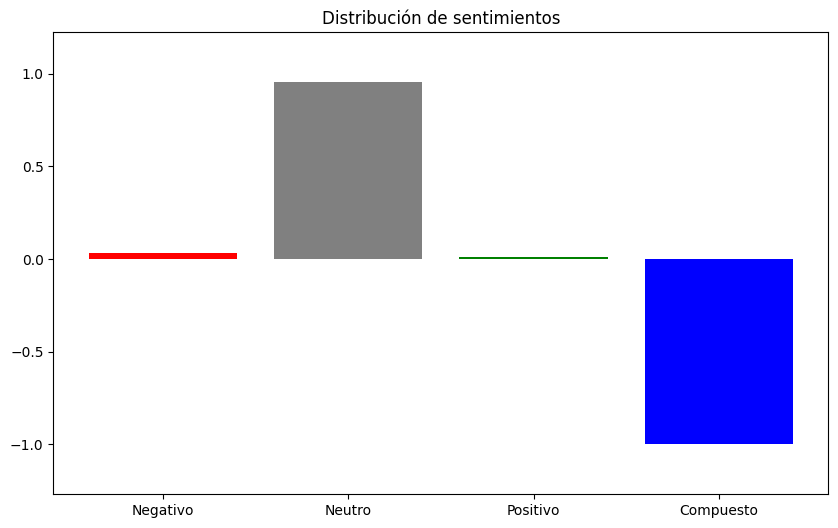

In [ ]:
labels = ['Negativo', 'Neutro', 'Positivo', 'Compuesto']
sizes = [sentiments['neg'], sentiments['neu'], sentiments['pos'], sentiments['compound']]
colors = ['red', 'gray', 'green', 'blue']
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors)
plt.axis('equal')
plt.title('Distribución de sentimientos')
plt.show()

### Gráfica de Sentimientos
Se genera una gráfica de barras para mostrar la distribución de los sentimientos en el texto.

In [ ]:
# Gráfica de barras horizontal por categoría
plt.figure(figsize=(10, 6))
clean_csv['Keyword'].value_counts().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Distribución de cursos por categoría')
plt.xlabel('Cantidad de cursos')
plt.ylabel('Categoría')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Gráfica de Barras Horizontal por Categoría
Se genera una gráfica de barras horizontal para mostrar la distribución de los cursos por categoría (`Keyword`).

In [ ]:
# Extraer valores numéricos de las columnas 'Duration' y 'Review'
clean_csv['Duration_numeric'] = clean_csv['Duration'].str.extract('(\d+)').astype(float)
clean_csv['Review_numeric'] = clean_csv['Review'].str.extract('(\d+)').astype(float)

# Filtrar valores nulos
scatter_data = clean_csv.dropna(subset=['Duration_numeric', 'Review_numeric'])

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['Duration_numeric'], scatter_data['Review_numeric'], alpha=0.5, color='purple')
plt.title('Duración del curso vs Número de revisiones')
plt.xlabel('Duración del curso (horas)')
plt.ylabel('Número de revisiones')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Gráfico de Dispersión
Se genera un gráfico de dispersión para mostrar la relación entre la duración de los cursos y el número de revisiones.

In [ ]:
# Histograma de duración de cursos
plt.figure(figsize=(10, 6))
clean_csv['Duration_numeric'].dropna().plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de duración de cursos')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Histograma de Duración de Cursos
Se genera un histograma para mostrar la distribución de la duración de los cursos.

In [ ]:
# Boxplot de calificaciones por nivel
plt.figure(figsize=(10, 6))
clean_csv.boxplot(column='Rating', by='Level', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot de calificaciones por nivel de dificultad')
plt.suptitle('')  # Elimina el título automático de Matplotlib
plt.xlabel('Nivel')
plt.ylabel('Calificación')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Boxplot de Calificaciones por Nivel
Se genera un boxplot para mostrar la distribución de las calificaciones por nivel de dificultad.

In [ ]:
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
# Tokenizar el texto
tokens = word_tokenize(text)

# Etiquetar las palabras con sus partes del habla
pos_tags = pos_tag(tokens)

# Reconocimiento de entidades nombradas
entities = ne_chunk(pos_tags)

# Extraer entidades nombradas
named_entities = []
for subtree in entities:
    if isinstance(subtree, Tree):
        entity_name = " ".join([token for token, pos in subtree.leaves()])
        entity_type = subtree.label()
        named_entities.append((entity_name, entity_type))

# Mostrar las entidades nombradas
print("Entidades nombradas encontradas:")
for entity_name, entity_type in named_entities:
    print(f"{entity_name} ({entity_type})")

### Reconocimiento de Entidades Nombradas
Se utiliza NLTK para identificar entidades nombradas en el texto:
- Se tokeniza el texto y se etiquetan las palabras con sus partes del habla (POS tagging).
- Se realiza el reconocimiento de entidades nombradas (NER) para identificar personas, organizaciones, ubicaciones, etc.

## Conclusión

El análisis realizado en este notebook demuestra cómo Python, con su ecosistema de librerías, es una herramienta poderosa y versátil para abordar tareas complejas de análisis de datos y procesamiento de lenguaje natural (NLP). A través de un flujo de trabajo estructurado, se logró extraer información valiosa tanto de datos estructurados como no estructurados, lo que permitió obtener una visión integral de los cursos analizados.

### Principales logros del análisis:

1. **Análisis de datos estructurados:**
   - Se utilizó `pandas` para la manipulación y limpieza de datos, eliminando valores nulos y duplicados, lo que garantizó la calidad de los datos analizados.
   - Se calcularon métricas clave como el promedio, la mejor y la peor calificación, y se identificaron los cursos asociados a estas métricas.
   - Se analizaron características específicas como los horarios flexibles, proporcionando una visión detallada de las preferencias y tendencias en los datos.

2. **Visualización de datos:**
   - Con `matplotlib`, se generaron gráficos claros e informativos, como histogramas, gráficos de dispersión, boxplots y gráficos de barras. Estas visualizaciones facilitaron la interpretación de los datos y permitieron identificar patrones y tendencias de manera intuitiva.
   - Las gráficas ayudaron a comunicar los resultados de manera efectiva, destacando aspectos clave como la distribución de niveles de los cursos y las categorías más populares.

3. **Procesamiento de lenguaje natural (NLP):**
   - Se aplicaron técnicas avanzadas de NLP utilizando `NLTK`, como tokenización, eliminación de stopwords, lematización y análisis de frecuencias. Estas técnicas permitieron procesar y analizar texto no estructurado de manera eficiente.
   - Se generaron nubes de palabras para visualizar las palabras más frecuentes, lo que proporcionó una representación visual atractiva y útil del contenido textual.
   - El análisis de sentimientos con `SentimentIntensityAnalyzer` permitió evaluar el tono general de los comentarios, identificando sentimientos positivos, negativos y neutros.

4. **Reconocimiento de entidades nombradas:**
   - Se utilizó el reconocimiento de entidades nombradas (NER) para identificar personas, organizaciones y ubicaciones mencionadas en el texto. Esto añadió una capa adicional de análisis, permitiendo extraer información específica y relevante del contenido textual.

### Reflexión sobre el uso de Python:

Python se consolida como una herramienta esencial para el análisis de datos y NLP debido a su flexibilidad, facilidad de uso y la amplia gama de librerías disponibles. Algunas de las ventajas clave observadas durante este análisis incluyen:

- **Eficiencia:** Las librerías como `pandas` y `matplotlib` permiten realizar tareas complejas de manipulación y visualización de datos con pocas líneas de código.
- **Escalabilidad:** Python es capaz de manejar tanto datos estructurados como no estructurados, lo que lo convierte en una solución integral para proyectos de análisis de datos.
- **Comunidad y soporte:** La extensa comunidad de Python garantiza acceso a documentación, ejemplos y soluciones para problemas comunes, lo que facilita el aprendizaje y la implementación de nuevas técnicas.

### Conclusión general:

Este análisis demuestra cómo Python puede ser utilizado para transformar datos en información valiosa y procesable. Desde la limpieza y visualización de datos hasta el análisis avanzado de texto, Python ofrece un conjunto de herramientas robustas que permiten a los analistas y científicos de datos abordar problemas complejos de manera eficiente. Además, la integración de técnicas de NLP amplía las posibilidades de análisis, permitiendo explorar y comprender datos no estructurados, como comentarios y reseñas.

En un mundo donde los datos son cada vez más abundantes y diversos, Python se posiciona como una herramienta indispensable para extraer conocimiento y tomar decisiones informadas basadas en datos. Este proyecto es un ejemplo claro de cómo el uso adecuado de Python puede generar insights significativos y aportar valor en contextos académicos, empresariales y de investigación.